In [1]:
import tifffile as tfl
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import image_utils as ps

## **Read image and mask file**

In [2]:
# in case error occurs
# PIL.Image.MAX_IMAGE_PIXELS = 441711756

# size of a single tile
tile_size = 512

# read image file
image_dir = 'my_image.tif'

image = tfl.imread(image_dir)

# read mask file
mask_dir = 'my_mask.png'
mask = np.array(Image.open(mask_dir))

print(f'shape of image: {image.shape}')

E:\Programming\Anaconda\envs\tf\lib\site-packages\PIL\Image.py:2834: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


shape of image: (10000, 10000, 3)


## **Resize image if necessary**

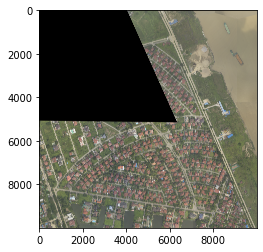

In [3]:
# set this to True if we want to resize
resize = False

# percentage to shrink or enlarge image
scale = 0.5

if resize:
    # resizes image
    image = ps.resize_image(image, percent = scale)
    mask = ps.resize_image(mask, percent = scale)
    
plt.imshow(image)

## **Visualize a sample tile**
- if we do not like the scale, we can go back up and change scale

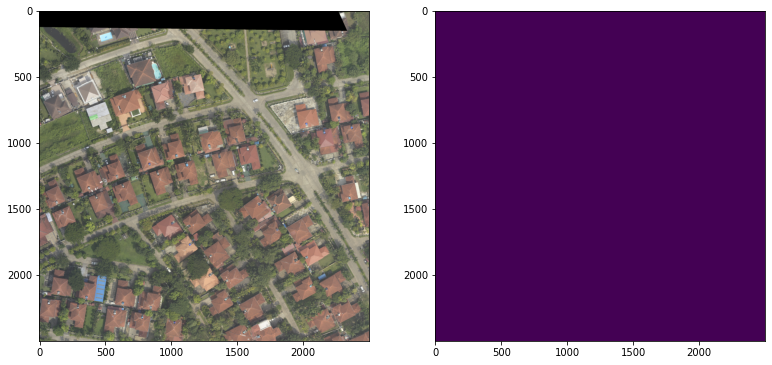

In [4]:
# x and y coordinates to plot
x = 4000
y = 5000

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13, 8))
ax1.imshow(image[y : y+tile_size, x : x+tile_size])
ax2.imshow(mask[y : y+tile_size, x : x+tile_size])

## **Pad and crop**

In [5]:
import image_utils as ps

# pad the image and mask according to model input size
padded_image = ps.pad(image, tile_size, tile_size)
padded_mask = ps.pad(mask, tile_size, tile_size)

# crop image and mask into tiles
cropped_image_tiles = ps.crop(padded_image, tile_size, tile_size)
cropped_mask_tiles = ps.crop(padded_mask, tile_size, tile_size)

print('Number of Tiles :', len(cropped_image_tiles))

image width =  10000 , image height =  10000
pad width =  0 , pad height =  0
image width =  10000 , image height =  10000
pad width =  0 , pad height =  0
Number of Tiles : 16


## **Create folders for saving images and masks**

In [6]:
dataset_folder = 'outputs/dataset'
# folder for saving images
img_save_dir = f'{dataset_folder}/images'

# folder for saving images
mask_save_dir = f'{dataset_folder}/masks'

# create directories for storing images and masks
os.makedirs(img_save_dir, exist_ok = True)
os.makedirs(mask_save_dir, exist_ok = True)

## **Save image tiles and mask tiles in target directory**

In [7]:
# image name formatting
area_name = 'area1'
image_format = 'png'
num_digit = 4

rotation_angles = [0, 90, 180, 270]
horizontal_flip = True

# save images in target directory
ps.generate_images(cropped_image_tiles, 
                   save_dir =  img_save_dir, 
                   area_name = area_name,
                   img_format = image_format,
                   num_digit = num_digit,
                   rotations = rotation_angles, 
                   flip_horizontal = horizontal_flip,
                   flip_vertical=False)

# save masks in target directory
ps.generate_images(cropped_mask_tiles, 
                   save_dir =  mask_save_dir, 
                   area_name = area_name,
                   img_format = image_format,
                   num_digit = num_digit,
                   rotations = rotation_angles, 
                   flip_horizontal = horizontal_flip,
                   flip_vertical=False)

outputs/dataset/images\area_1_0000_f0_a0.png
outputs/dataset/images\area_1_0000_f0_a90.png
outputs/dataset/images\area_1_0000_f0_a180.png
outputs/dataset/images\area_1_0000_f0_a270.png
outputs/dataset/images\area_1_0000_f1_a0.png
outputs/dataset/images\area_1_0000_f1_a90.png
outputs/dataset/images\area_1_0000_f1_a180.png
outputs/dataset/images\area_1_0000_f1_a270.png
outputs/dataset/images\area_1_0001_f0_a0.png
outputs/dataset/images\area_1_0001_f0_a90.png
outputs/dataset/images\area_1_0001_f0_a180.png
outputs/dataset/images\area_1_0001_f0_a270.png
outputs/dataset/images\area_1_0001_f1_a0.png
outputs/dataset/images\area_1_0001_f1_a90.png
outputs/dataset/images\area_1_0001_f1_a180.png
outputs/dataset/images\area_1_0001_f1_a270.png
outputs/dataset/images\area_1_0002_f0_a0.png
outputs/dataset/images\area_1_0002_f0_a90.png
outputs/dataset/images\area_1_0002_f0_a180.png
outputs/dataset/images\area_1_0002_f0_a270.png
outputs/dataset/images\area_1_0002_f1_a0.png
outputs/dataset/images\area_1_

outputs/dataset/masks\area_1_0006_f1_a180.png
outputs/dataset/masks\area_1_0006_f1_a270.png
outputs/dataset/masks\area_1_0007_f0_a0.png
outputs/dataset/masks\area_1_0007_f0_a90.png
outputs/dataset/masks\area_1_0007_f0_a180.png
outputs/dataset/masks\area_1_0007_f0_a270.png
outputs/dataset/masks\area_1_0007_f1_a0.png
outputs/dataset/masks\area_1_0007_f1_a90.png
outputs/dataset/masks\area_1_0007_f1_a180.png
outputs/dataset/masks\area_1_0007_f1_a270.png
outputs/dataset/masks\area_1_0008_f0_a0.png
outputs/dataset/masks\area_1_0008_f0_a90.png
outputs/dataset/masks\area_1_0008_f0_a180.png
outputs/dataset/masks\area_1_0008_f0_a270.png
outputs/dataset/masks\area_1_0008_f1_a0.png
outputs/dataset/masks\area_1_0008_f1_a90.png
outputs/dataset/masks\area_1_0008_f1_a180.png
outputs/dataset/masks\area_1_0008_f1_a270.png
outputs/dataset/masks\area_1_0009_f0_a0.png
outputs/dataset/masks\area_1_0009_f0_a90.png
outputs/dataset/masks\area_1_0009_f0_a180.png
outputs/dataset/masks\area_1_0009_f0_a270.png
out